In [1]:
# This pandas file takes the merged data and exports the visualizations required for this project.

In [2]:
# We'll use Pandas and Numpy for this Program.  We're also using pywaffle, a recently created
# program that builds waffle charts. install pywaffle with pip before using.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pywaffle import Waffle
%matplotlib notebook
from scipy.stats import linregress
from scipy import stats
import requests
import gmaps
import os
import json
#from opencage.geocoder import OpenCageGeocode

In [3]:
# Read the merged datafile created with the merger program.

complete_df = pd.read_csv('./interim_data/Merged_data.csv')
complete_df

,address,IHP Amount for Owners,Owners Approved,Owners <$10k,Owners $10-25k,Owners $25k - Max,Owners Max,IHP Amount for Renters,Renters Approved,Renters $25k - Max,Renters Max,incidentType,fyDeclared
0,"4116, IL, Brown (County)",32272,8.0,6.0,2.0,0.0,0.0,0,0.0,0.0,0.0,Flood,2013.0
1,"4116, IL, Bureau (County)",622024,260.0,251.0,9.0,0.0,0.0,29177,19.0,0.0,0.0,Flood,2013.0
2,"4116, IL, Calhoun (County)",31821,14.0,14.0,0.0,0.0,0.0,7079,4.0,0.0,0.0,Flood,2013.0
3,"4116, IL, Clark (County)",44331,11.0,9.0,2.0,0.0,0.0,0,0.0,0.0,0.0,Flood,2013.0
4,"4116, IL, Cook (County)",90293298,36895.0,35846.0,966.0,83.0,29.0,37099655,12965.0,35.0,1.0,Flood,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,"4466, TX, Montgomery (County)",8022615,1100.0,780.0,293.0,27.0,0.0,813403,207.0,0.0,0.0,Flood,2020.0
1124,"4466, TX, Orange (County)",9672865,1585.0,1186.0,374.0,25.0,0.0,1039349,322.0,0.0,0.0,Flood,2020.0
1125,"4466, TX, San Jacinto (County)",82351,20.0,18.0,2.0,0.0,0.0,4214,3.0,0.0,0.0,Flood,2020.0
1126,"4332, TX, Evangeline (Parish)",0,0.0,0.0,0.0,0.0,0.0,500,1.0,0.0,0.0,0,0.0


In [4]:
# Format the data a little.  We remove all the data with zeroes in the "incident type".
# We also separate the "address" to its original columns
# Finally, we combine "Hurricane" and "Typhoon" because they're one and the same.

complete_df[["Disaster", "State", "County"]] = complete_df.address.str.split(",", expand = True)
complete_df = complete_df.loc[complete_df["incidentType"]!= "0", :]

complete_df["incidentType"] = complete_df["incidentType"].replace({"Hurricane": "Tropical Storm"}) 
complete_df["incidentType"] = complete_df["incidentType"].replace({"Typhoon": "Tropical Storm"}) 

complete_df

C:\Users\paulk\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\paulk\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,address,IHP Amount for Owners,Owners Approved,Owners <$10k,Owners $10-25k,Owners $25k - Max,Owners Max,IHP Amount for Renters,Renters Approved,Renters $25k - Max,Renters Max,incidentType,fyDeclared,Disaster,State,County
0,"4116, IL, Brown (County)",32272,8.0,6.0,2.0,0.0,0.0,0,0.0,0.0,0.0,Flood,2013.0,4116,IL,Brown (County)
1,"4116, IL, Bureau (County)",622024,260.0,251.0,9.0,0.0,0.0,29177,19.0,0.0,0.0,Flood,2013.0,4116,IL,Bureau (County)
2,"4116, IL, Calhoun (County)",31821,14.0,14.0,0.0,0.0,0.0,7079,4.0,0.0,0.0,Flood,2013.0,4116,IL,Calhoun (County)
3,"4116, IL, Clark (County)",44331,11.0,9.0,2.0,0.0,0.0,0,0.0,0.0,0.0,Flood,2013.0,4116,IL,Clark (County)
4,"4116, IL, Cook (County)",90293298,36895.0,35846.0,966.0,83.0,29.0,37099655,12965.0,35.0,1.0,Flood,2013.0,4116,IL,Cook (County)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121,"4466, TX, Jefferson (County)",18405207,2319.0,1436.0,842.0,41.0,0.0,3933428,1207.0,0.0,0.0,Flood,2020.0,4466,TX,Jefferson (County)
1122,"4466, TX, Liberty (County)",3696788,579.0,435.0,137.0,7.0,0.0,566726,184.0,0.0,0.0,Flood,2020.0,4466,TX,Liberty (County)
1123,"4466, TX, Montgomery (County)",8022615,1100.0,780.0,293.0,27.0,0.0,813403,207.0,0.0,0.0,Flood,2020.0,4466,TX,Montgomery (County)
1124,"4466, TX, Orange (County)",9672865,1585.0,1186.0,374.0,25.0,0.0,1039349,322.0,0.0,0.0,Flood,2020.0,4466,TX,Orange (County)


In [5]:
df = complete_df

In [6]:
#  Visualization Set 1: Payout data by disaster type

In [7]:
#Group the data by incidents, summing the columns.  This will cause some of the columns to disappear, but that's alright.

grouping = complete_df.groupby(complete_df["incidentType"])
type_grouping = grouping.sum()
del type_grouping["fyDeclared"]
type_grouping

,IHP Amount for Owners,Owners Approved,Owners <$10k,Owners $10-25k,Owners $25k - Max,Owners Max,IHP Amount for Renters,Renters Approved,Renters $25k - Max,Renters Max
incidentType,,,,,,,,,,
Earthquake,36189972,7484.0,6621.0,422.0,441.0,21.0,1241778,1113.0,1.0,0.0
Fire,71933716,5447.0,3611.0,218.0,1618.0,328.0,62744642,10265.0,108.0,16.0
Flood,1425709204,247502.0,201715.0,33127.0,12660.0,4748.0,296157372,89239.0,227.0,43.0
Mud/Landslide,1424708,376.0,364.0,2.0,10.0,9.0,665030,218.0,0.0,0.0
Severe Storm(s),165613733,32403.0,27371.0,3825.0,1207.0,573.0,44154377,14012.0,25.0,12.0
Tornado,18677632,3241.0,2740.0,256.0,245.0,171.0,17169684,5411.0,13.0,5.0
Tropical Storm,3376668721,966516.0,864902.0,79156.0,22458.0,10193.0,1217530711,826654.0,261.0,59.0
Volcano,10080658,627.0,411.0,17.0,199.0,0.0,2209482,381.0,3.0,0.0


In [8]:
# Create a datafram with Total amount given to renters/owners, average payout, and total people paid. Group by disaster.

grouping_full_prime = type_grouping.sort_values(["IHP Amount for Owners"], ascending = True)

grouping_full = grouping_full_prime.loc[:,["IHP Amount for Owners", "IHP Amount for Renters", "Owners Approved", "Renters Approved"]]
grouping_full["Owners' Average Payout"] = grouping_full["IHP Amount for Owners"]/grouping_full["Owners Approved"]    
grouping_full["Renters' Average Payout"] = grouping_full["IHP Amount for Renters"]/grouping_full["Renters Approved"]    

grouping_full


,IHP Amount for Owners,IHP Amount for Renters,Owners Approved,Renters Approved,Owners' Average Payout,Renters' Average Payout
incidentType,,,,,,
Mud/Landslide,1424708,665030,376.0,218.0,3789.117021,3050.596330
Volcano,10080658,2209482,627.0,381.0,16077.604466,5799.165354
Tornado,18677632,17169684,3241.0,5411.0,5762.922555,3173.107374
Earthquake,36189972,1241778,7484.0,1113.0,4835.645644,1115.703504
Fire,71933716,62744642,5447.0,10265.0,13206.116394,6112.483390
Severe Storm(s),165613733,44154377,32403.0,14012.0,5111.061723,3151.183057
Flood,1425709204,296157372,247502.0,89239.0,5760.394680,3318.698910
Tropical Storm,3376668721,1217530711,966516.0,826654.0,3493.650101,1472.841976


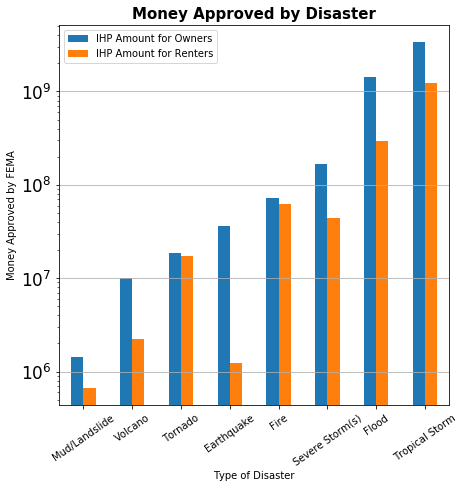

In [9]:
#Create a barchart for the Total money approved

amount_grouping = grouping_full.loc[:,["IHP Amount for Owners", "IHP Amount for Renters"]]
amount_chart = amount_grouping.plot(kind='bar', logy = True, rot = 35, figsize = (7, 7))

# Set the xlabel and ylabel using class methods
amount_chart.set_xlabel("Type of Disaster")
amount_chart.set_ylabel("Money Approved by FEMA")
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=17)
plt.grid(axis='y')
plt.title('Money Approved by Disaster', fontsize=15, fontweight='bold')

amount_chart
plt.savefig('./output_visual/Money Approved by FEMA')


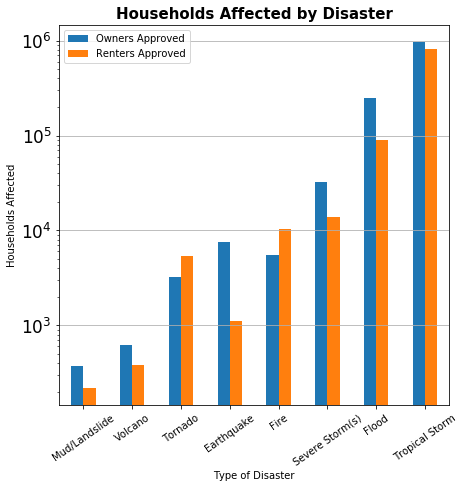

In [10]:
#Create a barchart for the number of households affect

people_grouping = grouping_full.loc[:,["Owners Approved", "Renters Approved"]]
people_chart = people_grouping.plot(kind='bar', logy = True, rot = 35, figsize = (7, 7))

# Set the xlabel and ylabel using class methods
people_chart.set_xlabel("Type of Disaster")
people_chart.set_ylabel("Households Affected")
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=17)
plt.grid(axis='y')
plt.title('Households Affected by Disaster', fontsize=15, fontweight='bold')

people_chart
plt.savefig('./output_visual/Households Affected')

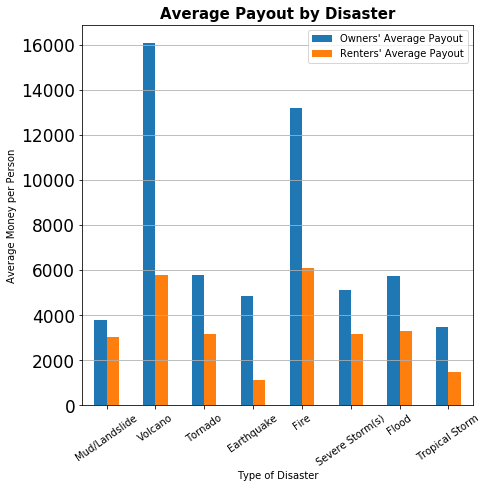

In [11]:
#Create a barchart for the average money received

average_grouping = grouping_full.loc[:,["Owners' Average Payout", "Renters' Average Payout"]]
average_chart = average_grouping.plot(kind='bar', rot = 35, figsize = (7, 7))

# Set the xlabel and ylabel using class methods
average_chart.set_xlabel("Type of Disaster")
average_chart.set_ylabel("Average Money per Person")
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=17)
plt.grid(axis='y')
plt.title('Average Payout by Disaster', fontsize=15, fontweight='bold')

average_chart
plt.savefig('./output_visual/Average Money per Person')

In [12]:
# Visualization Set 2: Counties affected by Disaster

In [13]:
#Dropping the duplicates and checking the incident types
incident_type = df['incidentType'].drop_duplicates()
print(incident_type)

0                Flood
35             Tornado
73       Mud/Landslide
75     Severe Storm(s)
105         Earthquake
223     Tropical Storm
233               Fire
893            Volcano
Name: incidentType, dtype: object


In [14]:
#Dropping the duplicates from years and checking the years entries
years = df['fyDeclared'].drop_duplicates()
print(years)

0       2013.0
59      2014.0
110     2015.0
235     2016.0
478     2017.0
848     2018.0
944     2019.0
1119    2020.0
Name: fyDeclared, dtype: float64


In [15]:
#created another dataframe where the records are counted by incident type for all years
dfb = df
dfb["incidentType"] = dfb["incidentType"].replace({"Hurricane": "Tropical Storm"}) 
dfb["incidentType"] = dfb["incidentType"].replace({"Typhoon": "Tropical Storm"}) 
dfb["incidentType"] = dfb["incidentType"].replace({"Volcano": "Other"}) 
dfb["incidentType"] = dfb["incidentType"].replace({"Mud/Landslide": "Other"}) 
dfb["incidentType"] = dfb["incidentType"].replace({"Earthquake": "Other"}) 
dfb["incidentType"] = dfb["incidentType"].replace({"Fire": "Other"}) 
dfb = dfb.groupby(['incidentType']).count().reset_index()
dfb

C:\Users\paulk\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\paulk\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\paulk\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,incidentType,address,IHP Amount for Owners,Owners Approved,Owners <$10k,Owners $10-25k,Owners $25k - Max,Owners Max,IHP Amount for Renters,Renters Approved,Renters $25k - Max,Renters Max,fyDeclared,Disaster,State,County
0,Flood,406,406,406,406,406,406,406,406,406,406,406,406,406,406,406
1,Other,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
2,Severe Storm(s),258,258,258,258,258,258,258,258,258,258,258,258,258,258,258
3,Tornado,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49
4,Tropical Storm,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384


In [16]:
#If we check above, we have an incident type "0", in this instance we are taking all the records that do not have that incident type.
#Any records with incident "0" are excluded
dfb = dfb[~dfb["incidentType"].str.contains("0")]
dfb

,incidentType,address,IHP Amount for Owners,Owners Approved,Owners <$10k,Owners $10-25k,Owners $25k - Max,Owners Max,IHP Amount for Renters,Renters Approved,Renters $25k - Max,Renters Max,fyDeclared,Disaster,State,County
0,Flood,406,406,406,406,406,406,406,406,406,406,406,406,406,406,406
1,Other,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
2,Severe Storm(s),258,258,258,258,258,258,258,258,258,258,258,258,258,258,258
3,Tornado,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49
4,Tropical Storm,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384


In [17]:
#creating a pie chart of incidents in all years nd sorting it by 
# what percentage of incidents that were approved for the owners
# we can change the selection to 'Renters Approved' to see percentage by renters
incident_type = dfb['incidentType']
years = dfb['Owners Approved']
colors = ["yellow", "green", "lightblue", "orange", "red",
          "purple", "pink", "yellowgreen", "lightskyblue","lightcoral"]
explode = (0.1, 0, 0, 0, 0.1, 0, 0, 0, 0)



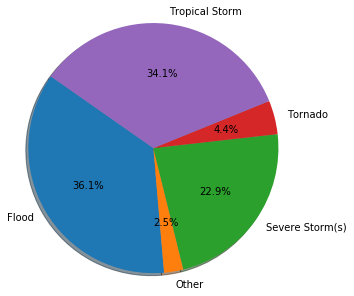

In [18]:
### # Tell matplotlib to create a pie chart based upon the above data
fig = plt.figure(figsize = (5,5))
ax2 = fig.add_subplot(111)
ax2.pie(years, labels= incident_type, 
        autopct="%1.1f%%", shadow=True, startangle=145)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("./output_visual/counties_affected_pie.png")
plt.show()

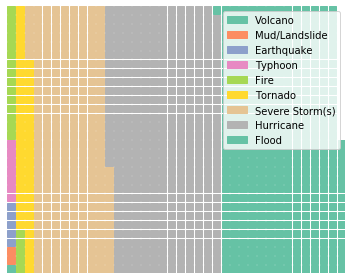

In [19]:
waffler = {'Volcano': 1, 'Mud/Landslide': 2, 'Earthquake': 5, 'Typhoon': 7, 
           'Fire': 20, 'Tornado': 49, 'Severe Storm(s)': 258, 'Hurricane': 377, 'Flood': 406,}

fig = plt.figure(
    FigureClass=Waffle, 
    rows=30,
    values= waffler
)
plt.savefig("./output_visual/counties_affect_waffle.png")

In [20]:
# Visualization Set 3: Box plot of average payout by state

In [21]:
state_grouping = complete_df.groupby(complete_df["State"])
sum_grouping = state_grouping.sum()
del(sum_grouping["fyDeclared"])
sum_grouping

,IHP Amount for Owners,Owners Approved,Owners <$10k,Owners $10-25k,Owners $25k - Max,Owners Max,IHP Amount for Renters,Renters Approved,Renters $25k - Max,Renters Max
State,,,,,,,,,,
AK,28804366,4407.0,3633.0,319.0,455.0,30.0,729691,217.0,3.0,0.0
AL,17090968,4343.0,3937.0,297.0,109.0,49.0,7484733,3446.0,2.0,2.0
AR,16448380,2088.0,1504.0,390.0,194.0,61.0,2672766,835.0,1.0,0.0
AS,18607988,4959.0,4662.0,243.0,54.0,0.0,1905066,1120.0,0.0,0.0
CA,81110624,8704.0,6708.0,374.0,1622.0,317.0,61522219,10831.0,108.0,15.0
CO,53252166,13460.0,12178.0,871.0,411.0,256.0,8651481,3090.0,6.0,1.0
FL,674637391,358865.0,345421.0,11485.0,1959.0,426.0,557184408,465077.0,69.0,13.0
GA,24221939,8437.0,7877.0,449.0,111.0,39.0,12120455,9034.0,1.0,0.0
HI,11292808,789.0,541.0,39.0,209.0,0.0,2589254,471.0,3.0,0.0


In [22]:

sum_grouping = sum_grouping.loc[:,["IHP Amount for Owners", "Owners Approved", "IHP Amount for Renters", "Renters Approved"]]
sum_grouping["Average Payout for Owners, Dollars"] = sum_grouping["IHP Amount for Owners"]/sum_grouping["Owners Approved"]
sum_grouping["Average Payout for Renters, Dollars"] = sum_grouping["IHP Amount for Renters"]/sum_grouping["Renters Approved"]
sum_grouping

,IHP Amount for Owners,Owners Approved,IHP Amount for Renters,Renters Approved,"Average Payout for Owners, Dollars","Average Payout for Renters, Dollars"
State,,,,,,
AK,28804366,4407.0,729691,217.0,6536.048559,3362.631336
AL,17090968,4343.0,7484733,3446.0,3935.290813,2172.006094
AR,16448380,2088.0,2672766,835.0,7877.576628,3200.917365
AS,18607988,4959.0,1905066,1120.0,3752.367009,1700.951786
CA,81110624,8704.0,61522219,10831.0,9318.775735,5680.197489
CO,53252166,13460.0,8651481,3090.0,3956.327340,2799.832039
FL,674637391,358865.0,557184408,465077.0,1879.919722,1198.047652
GA,24221939,8437.0,12120455,9034.0,2870.918454,1341.648771
HI,11292808,789.0,2589254,471.0,14312.811153,5497.354565


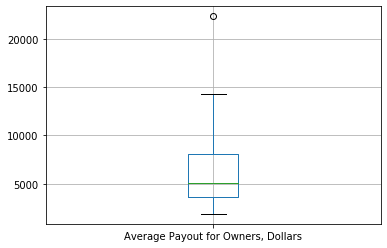

In [23]:
owner = sum_grouping.loc[:,["Average Payout for Owners, Dollars"]]

owner_box = owner.boxplot()
owner_box.plot
plt.savefig('./output_visual/Owner Boxplot')

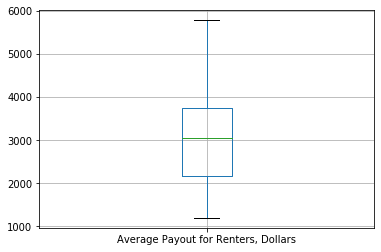

In [24]:
renter = sum_grouping.loc[:,["Average Payout for Renters, Dollars"]]


renter_box = renter.boxplot()
renter_box
plt.savefig('./output_visual/Renter Boxplot')

In [25]:
# Visualization Set 4: Disasters Over Time

In [26]:
#Read in the csv dataset
disasters_data = pd.read_csv('./interim_data/summaries.csv')
disasters_data

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,...,incidentBeginDate,incidentEndDate,disasterCloseoutDate,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,hash,lastRefresh
0,DR-4-MI,4,MI,DR,1953-06-02T04:00:00.000Z,1953,Tornado,TORNADO,0,1,...,1953-06-02T04:00:00.000Z,1953-06-02T04:00:00.000Z,NaN,26.0,0.0,0.0,Statewide,53004.0,8c9dee13124e36a9dfe2eb74e33fafad,2019-07-26T18:49:32.240Z
1,DR-2-TX,2,TX,DR,1953-05-15T04:00:00.000Z,1953,Tornado,TORNADO & HEAVY RAINFALL,0,1,...,1953-05-15T04:00:00.000Z,1953-05-15T04:00:00.000Z,NaN,48.0,0.0,0.0,Statewide,53003.0,c5a1a4a1030d6730d9c562cdbe7c830f,2019-07-26T18:49:32.163Z
2,DR-9-TX,9,TX,DR,1953-06-19T04:00:00.000Z,1953,Flood,FLOOD,0,1,...,1953-06-19T04:00:00.000Z,1953-06-19T04:00:00.000Z,NaN,48.0,0.0,0.0,Statewide,53010.0,4485da27a9218458eb2d13a6c33a4c62,2019-07-26T18:49:32.164Z
3,DR-11-NH,11,NH,DR,1953-07-02T04:00:00.000Z,1953,Fire,FOREST FIRE,0,1,...,1953-07-02T04:00:00.000Z,1953-07-02T04:00:00.000Z,NaN,33.0,0.0,0.0,Statewide,53011.0,86a70820dbb80e585cc01e2ce502005c,2019-07-26T18:49:32.163Z
4,DR-6-MI,6,MI,DR,1953-06-09T04:00:00.000Z,1953,Tornado,TORNADO,0,1,...,1953-06-09T04:00:00.000Z,1953-06-09T04:00:00.000Z,NaN,26.0,0.0,0.0,Statewide,53007.0,d3ae03a5caa78ae1c8b6052e5e29a97d,2019-07-26T18:49:32.163Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23430,DR-1674-NE,1674,NE,DR,2007-01-08T01:30:00.000Z,2007,Severe Storm(s),SEVERE WINTER STORMS,0,0,...,2006-12-19T05:00:00.000Z,2007-01-01T05:00:00.000Z,NaN,31.0,1.0,99001.0,Adams (County),7781.0,fb22b5aa65259ecd9fb63ff53e22fecd,2019-07-26T18:49:51.467Z
23431,DR-1736-MO,1736,MO,DR,2007-12-27T19:20:00.000Z,2008,Severe Ice Storm,SEVERE WINTER STORMS,0,0,...,2007-12-06T05:00:00.000Z,2007-12-15T05:00:00.000Z,NaN,29.0,163.0,99163.0,Pike (County),7934.0,df52f6964eed26b596597ca9e89d0b9a,2019-07-26T18:49:52.333Z
23432,DR-1658-TX,1658,TX,DR,2006-08-15T21:07:00.000Z,2006,Severe Storm(s),SEVERE STORMS AND FLOODING,1,1,...,2006-07-27T04:00:00.000Z,2006-08-25T04:00:00.000Z,NaN,48.0,141.0,99141.0,El Paso (County),6135.0,bb623493ad010c44c489b0746d627e2a,2019-07-26T18:49:51.356Z
23433,DR-1688-IA,1688,IA,DR,2007-03-14T23:00:00.000Z,2007,Severe Storm(s),SEVERE WINTER STORMS,0,0,...,2007-02-23T05:00:00.000Z,2007-03-02T05:00:00.000Z,NaN,19.0,91.0,99091.0,Humboldt (County),7799.0,8052bbaf5b42b691790f2e74db828719,2019-07-26T18:49:51.698Z


In [27]:
#Create a count of disasters by year using value_count and 
b = disasters_data['fyDeclared']
c = b.value_counts().to_frame()
d = c.rename(columns={'fyDeclared':'Disaster Count'})
disaster_count = d.reset_index().rename(columns={'index':'Year'})
disaster_count = disaster_count.sort_values(['Year']).reset_index().drop(['index'], axis=1)
disaster_count.tail(10)

,Year,Disaster Count
49,2002,823
50,2003,1246
51,2004,1753
52,2005,881
53,2006,576
54,2007,430
55,2008,230
56,2009,52
57,2010,19
58,2011,5


In [28]:
#Create Linear Regression Line
da_slope, da_int, da_r, da_p, da_std_err = stats.linregress(disaster_count['Year'], disaster_count['Disaster Count'])
da_fit = da_slope * disaster_count['Year'] + da_int

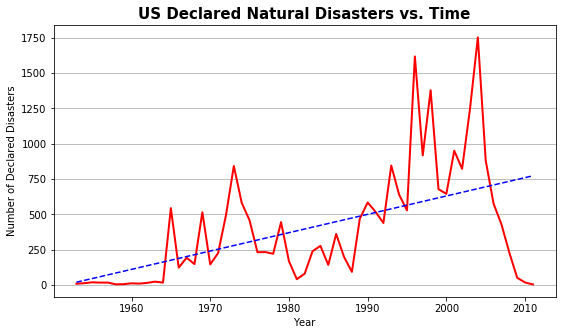

In [40]:
#Plot time series data with trend line
#Plot figure
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(disaster_count['Year'], disaster_count['Disaster Count'], linewidth=2, color='r')
ax.plot(disaster_count['Year'], da_fit, 'b--')
    

#Set line chart attributes
plt.title('US Declared Natural Disasters vs. Time', fontsize=15, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Declared Disasters')
plt.grid(axis='y')

#Visualize plot
ax
plt.savefig('./output_visual/Declared Disasters Over Time.png')


In [30]:
#Visual 5

In [31]:
# Import "Disaster Declarations" pivot table
disaster_declare = "./interim_data/orig_piv_chart.csv"
DD_df = pd.read_csv(disaster_declare, low_memory=False)
del DD_df["fyDeclared"]
DD_df

,Chemical,Coastal Storm,Dam/Levee Break,Drought,Earthquake,Fire,Fishing Losses,Flood,Freezing,Human Cause,...,Other,Severe Ice Storm,Severe Storm(s),Snow,Terrorist,Tornado,Toxic Substances,Tsunami,Typhoon,Volcano
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,2.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.0,1.0,0.0,0.0,0.0,52.0,0.0,400.0,0.0,0.0,...,0.0,21.0,393.0,74.0,0.0,1.0,1.0,0.0,0.0,0.0
64,0.0,0.0,3.0,0.0,0.0,90.0,0.0,220.0,0.0,0.0,...,0.0,20.0,257.0,55.0,0.0,45.0,0.0,0.0,0.0,0.0
65,0.0,3.0,0.0,0.0,0.0,105.0,0.0,185.0,0.0,0.0,...,0.0,0.0,121.0,39.0,0.0,2.0,0.0,0.0,7.0,1.0
66,0.0,42.0,0.0,0.0,8.0,24.0,0.0,648.0,0.0,0.0,...,0.0,0.0,554.0,0.0,0.0,13.0,0.0,0.0,9.0,0.0


In [32]:
# Rank the disasters in order of descending counties affected
ranks_df = DD_df.sum().sort_values(ascending = False)
# set the dataframe
ranks_df =ranks_df.reset_index()
# ranks_df = ranks_df.groupby(['fyDeclared']).count().reset_index()

In [33]:
# rename the columns
ranks_df = ranks_df.rename(columns = {"index": "Disasters", 0:"Total"})
# check the dataframe
ranks_df

,Disasters,Total
0,Severe Storm(s),16683.0
1,Hurricane,10876.0
2,Flood,10335.0
3,Snow,3659.0
4,Fire,3316.0
5,Severe Ice Storm,1990.0
6,Tornado,1445.0
7,Drought,1292.0
8,Coastal Storm,507.0
9,Freezing,301.0


In [34]:
# Summing all the disasters
disaster_sum = ranks_df['Total'].sum()
disaster_sum

51113.0

In [35]:
# Creating a new column calculating percentage of disasters from year 2013-2020
ranks_df['Percentage_of_disasters'] = ((ranks_df['Total'])/(disaster_sum))
ranks_df['Percentage_of_disasters']=ranks_df['Percentage_of_disasters'].map("{:,.2%}".format)
ranks_df

,Disasters,Total,Percentage_of_disasters
0,Severe Storm(s),16683.0,32.64%
1,Hurricane,10876.0,21.28%
2,Flood,10335.0,20.22%
3,Snow,3659.0,7.16%
4,Fire,3316.0,6.49%
5,Severe Ice Storm,1990.0,3.89%
6,Tornado,1445.0,2.83%
7,Drought,1292.0,2.53%
8,Coastal Storm,507.0,0.99%
9,Freezing,301.0,0.59%


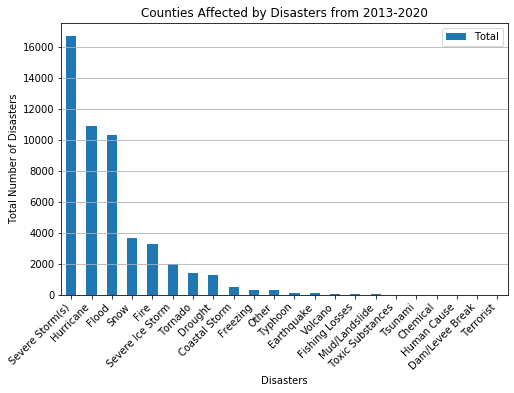

In [41]:
# plotting the disasters in a bar chart
ax = ranks_df.plot(kind="bar", figsize=(8,5))
ax.set_xticklabels(ranks_df["Disasters"], rotation=45, ha = "right")
ax.set_xlabel("Disasters")
ax.set_ylabel("Total Number of Disasters")
ax.set_title("Counties Affected by Disasters from 2013-2020")

plt.grid(axis = 'y')

ax
plt.savefig('./output_visual/Counties affected by Disasters from 2013 - 2020.png')